# TASK 1 : Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#set the path to the main dir
import os
main_dir = "/content/drive/MyDrive/Covid X_Ray Data"
#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')
#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(train_normal_names[:10])

['COVID-2778.png', 'COVID-2828.png', 'COVID-2751.png', 'COVID-2793.png', 'COVID-2739.png', 'COVID-2774.png', 'COVID-2763.png', 'COVID-2766.png', 'COVID-2810.png', 'COVID-2753.png']
['Normal-705.png', 'Normal-702.png', 'Normal-704.png', 'Normal-703.png', 'Normal-70.png', 'Normal-701.png', 'Normal-700.png', 'Normal-7.png', 'Normal-699.png', 'Normal-698.png']
['COVID-3009.png', 'COVID-3007.png', 'COVID-3004.png', 'COVID-3002.png', 'COVID-3006.png', 'COVID-3005.png', 'COVID-3001.png', 'COVID-3003.png', 'COVID-3008.png', 'COVID-3010.png']
['Normal-705.png', 'Normal-702.png', 'Normal-704.png', 'Normal-703.png', 'Normal-70.png', 'Normal-701.png', 'Normal-700.png', 'Normal-7.png', 'Normal-699.png', 'Normal-698.png']


In [5]:
#print the total no of images present in each dir
print("Training set: ", len(train_covid_names + train_normal_names))
print("Testing set: ", len(test_covid_names + test_normal_names))

Training set:  6500
Testing set:  1276


# TASK 3 : Data Visualization

['/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2778.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2828.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2751.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2793.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2739.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2774.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2763.png', '/content/drive/MyDrive/Covid X_Ray Data/train/COVID19/COVID-2766.png']
['/content/drive/MyDrive/Covid X_Ray Data/train/NORMAL/Normal-705.png', '/content/drive/MyDrive/Covid X_Ray Data/train/NORMAL/Normal-702.png', '/content/drive/MyDrive/Covid X_Ray Data/train/NORMAL/Normal-704.png', '/content/drive/MyDrive/Covid X_Ray Data/train/NORMAL/Normal-703.png', '/content/drive/MyDrive/Covid X_Ray Data/train/NORMAL/Normal-70.png', '/content/drive/MyDrive/Covid X_Ray Data/train/NORMAL/Normal-701.png

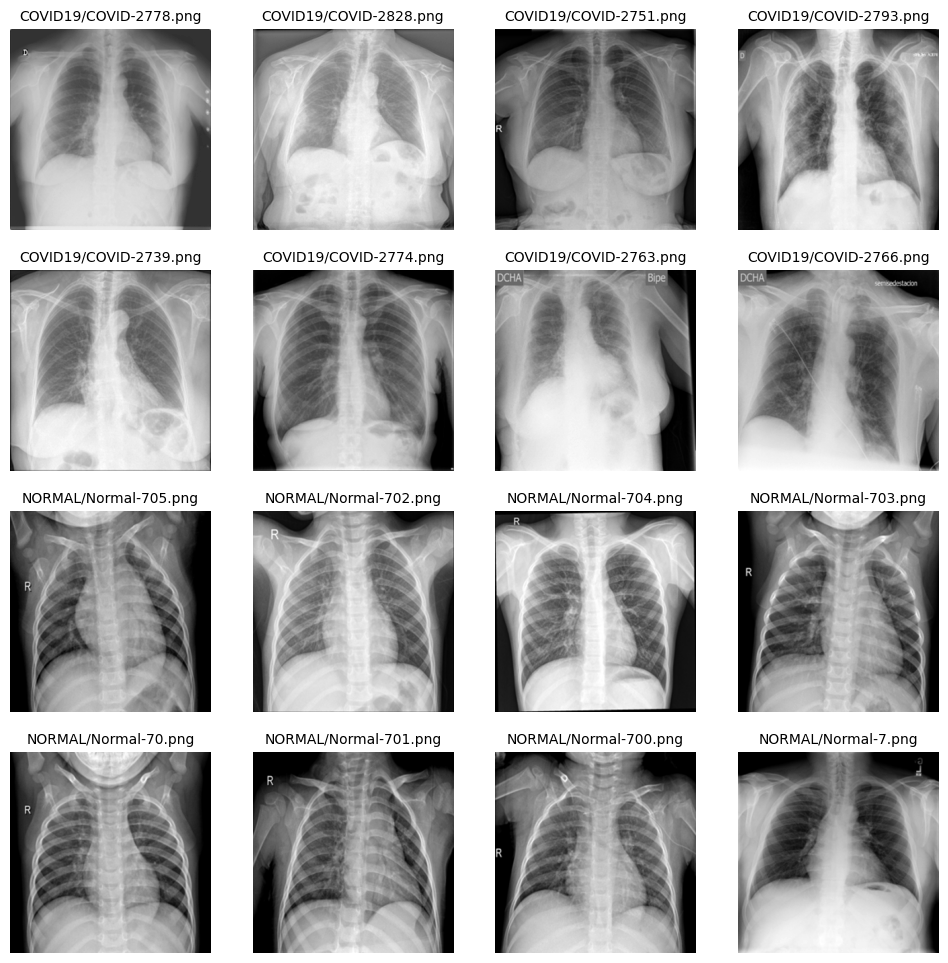

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic

for i, img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')
plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [7]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                shear_range = 0.2,
                                horizontal_flip= True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')




Found 5200 images belonging to 2 classes.
Found 1300 images belonging to 2 classes.
Found 1276 images belonging to 2 classes.


In [8]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [10]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [11]:
#compile the model
callback = EarlyStopping(monitor='loss', patience=3)
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
#train the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data = validation_generator, callbacks = [callback])


Epoch 1/50
163/163 [==============================] - 1393s 8s/step - loss: 0.7802 - accuracy: 0.6617 - val_loss: 0.5033 - val_accuracy: 0.8015
Epoch 2/50
163/163 [==============================] - 59s 364ms/step - loss: 0.5258 - accuracy: 0.7338 - val_loss: 0.4915 - val_accuracy: 0.7746
Epoch 3/50
163/163 [==============================] - 58s 356ms/step - loss: 0.4940 - accuracy: 0.7537 - val_loss: 0.3980 - val_accuracy: 0.8423
Epoch 4/50
163/163 [==============================] - 59s 359ms/step - loss: 0.4715 - accuracy: 0.7690 - val_loss: 0.3899 - val_accuracy: 0.8346
Epoch 5/50
163/163 [==============================] - 68s 418ms/step - loss: 0.4482 - accuracy: 0.7823 - val_loss: 0.3219 - val_accuracy: 0.8669
Epoch 6/50
163/163 [==============================] - 58s 354ms/step - loss: 0.4348 - accuracy: 0.8017 - val_loss: 0.3424 - val_accuracy: 0.8738
Epoch 7/50
163/163 [==============================] - 58s 356ms/step - loss: 0.4188 - accuracy: 0.7956 - val_loss: 0.3197 - val_acc

# TASK 7 : Performance Evaluation

In [13]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

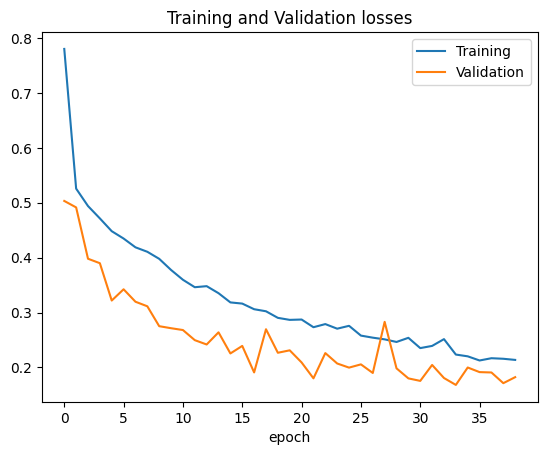

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

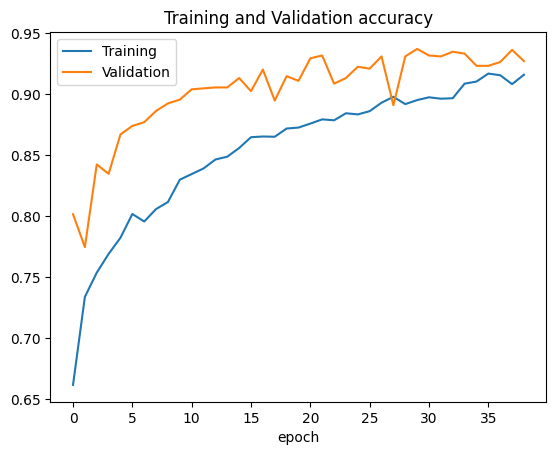

In [15]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [16]:
# get the test acuarcy and loss
test_loss , test_acc = model.evaluate(test_generator)

print('test loss :{} test acc :{}'.format(test_loss, test_acc))

40/40 [==============================] - 260s 7s/step - loss: 0.2338 - accuracy: 0.9013
test loss :0.2338053286075592 test acc :0.9012539386749268


# TASK 8 : Prediction On New Data

In [18]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()

for filename in uploaded.keys():
  img_path ='/content/'+filename
  img = load_img(img_path, target_size=(150,150))
  images = img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('Positive For Covid-19')
  else:
    print('Your report is Normal')

Saving covid1.jpg to covid1.jpg
Saving covid2.jpg to covid2.jpg
Saving normal1.jpg to normal1.jpg
Saving normal2.jpg to normal2.jpg
1/1 [==============================] - 0s 183ms/step
covid1.jpg
Positive For Covid-19
1/1 [==============================] - 0s 20ms/step
covid2.jpg
Positive For Covid-19
1/1 [==============================] - 0s 18ms/step
normal1.jpg
Your report is Normal
1/1 [==============================] - 0s 21ms/step
normal2.jpg
Your report is Normal


In [17]:
model.save("/content/drive/MyDrive/Covid X_Ray Data/covid19.h5")